# Linear Regression - Insurance Costs

## 1 of 9 · Introduction

In [6]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [7]:
insurance = pd.read_csv('insurance.csv')

In [8]:
print(insurance.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


The columns in the dataset are:

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

## 2 of 9 · Exploring The Dataset

the `Charges` column is our outcome variable, while everything else are the potential predictors to use in the model

array([[<Axes: title={'center': 'charges'}>]], dtype=object)

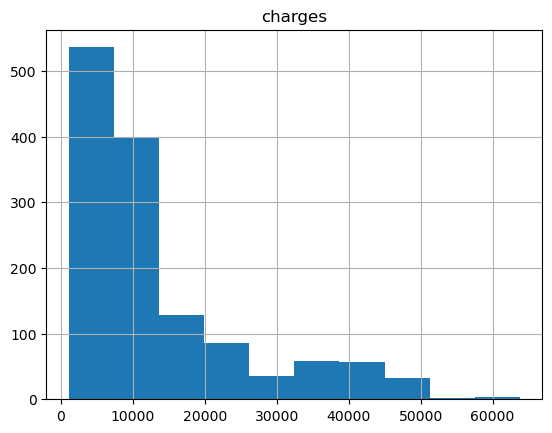

In [55]:
insurance.hist("charges")

We see that the variable is highly skewed to the right, it is necessary to take a log transformation of the charges column, we will use the variables `log_charges` as our outcome variable

array([[<Axes: title={'center': 'log_charges'}>]], dtype=object)

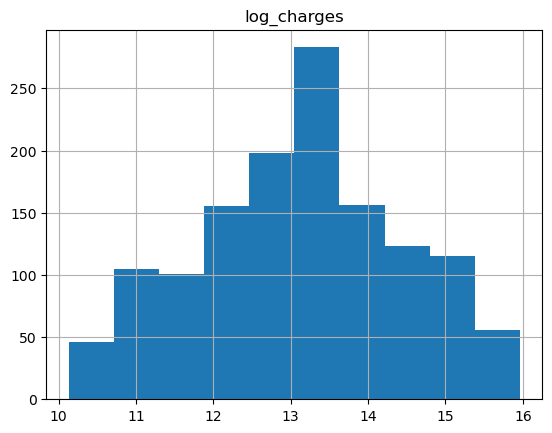

In [15]:
insurance['log_charges'] = np.log2(insurance['charges'])

insurance.hist('log_charges')

The transformed variable is now normally distributed, this will clearly aid in satifying the residual assumptions of linear regression modelling. 

In [16]:
insurance.corr()

/var/folders/sv/6pzthr9921vblbsgdt4thkdc0000gn/T/ipykernel_18069/330660132.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  insurance.corr()


,age,bmi,children,charges,log_charges
age,1.000000,0.109272,0.042469,0.299008,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.892964
log_charges,0.527834,0.132669,0.161336,0.892964,1.000000


`age` has a 30% correlation with `charges`, `bmi` has a 19.8% correlation with `charges`, both variables have a strong positive linear relationship with the outcome variable, they will be good predictor variables. Number of children has a 6% correletion with the outcome suggestive of a weak positive linear relationship.

None of the predictor variables are highly correlated with one another, auto-correlation will not be an issue here. 

Lets examine the difference in `log_charges` for different values of categorical variables

<Axes: title={'center': 'log_charges'}, xlabel='sex'>

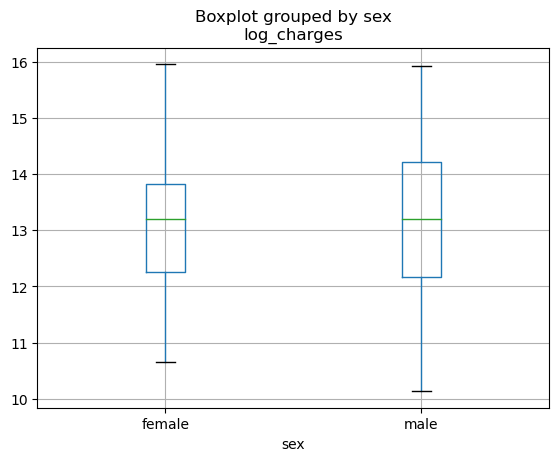

In [17]:
insurance.boxplot(column = ["log_charges"], by = "sex")

<Axes: title={'center': 'log_charges'}, xlabel='region'>

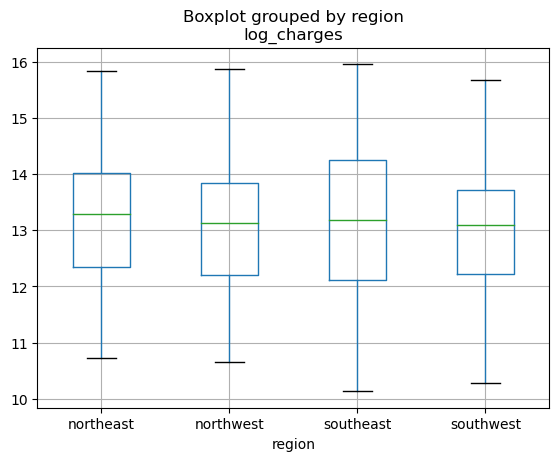

In [18]:
insurance.boxplot(column = ["log_charges"], by = "region")

<Axes: title={'center': 'log_charges'}, xlabel='smoker'>

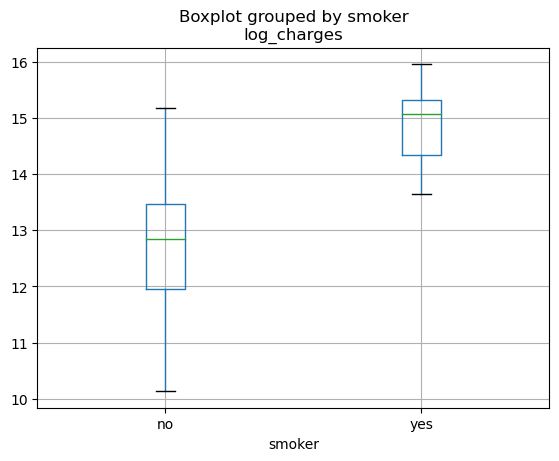

In [19]:
insurance.boxplot(column = ["log_charges"], by = "smoker")

There is a clear difference in the mean `log_charge` between smokers and non-smokers. There is not much of a difference in the mean log_charge across genders and regions. The `smoker` variable is a good candidate for our model

### Predictors
I will proceed with `age`, `bmi` and `smoker` as predictors of `log_charges` in the model

## 3 of 9 · Dividing The Data

First, extract the outcome variable as y, the predictors are placed in dataset X. We then split the data into 75% training dataset and 25% testing dataset. 

In [22]:
insurance['is_smoker'] = (insurance['smoker'] == 'yes')

y = insurance['log_charges']
X = insurance[['age', 'bmi', 'is_smoker']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 112)

## 4 of 9 · Build The Model

Creating an instance of LinearRegression called lm, we fit the model with the training data X and y.

In [25]:
lm = LinearRegression()

# fit the model using the training data
lm.fit(X_train, y_train)


LinearRegression()

Now, we use the model to generate predicted values based on the training X dataset

In [65]:
#generate the prediciton values from the training data
y_prediction  = lm.predict(X_train)

#Calculate the MSE by comparing the training data and the predictions
mse = mean_squared_error(y_train, y_prediction)

# Calculate the MSE in the context of the Insurance data
exp_mse = np.exp(mse)

#Coefficient of determination
r2 = r2_score(y_train, y_prediction)

In [68]:
print(f'Mean Squared Error = {mse} \nExponential Mean Squared Error = {exp_mse} \nCoefficient of Determination = {r2}')

Mean Squared Error = 0.45753247789985685 
Exponential Mean Squared Error = 1.5801700659123568 
Coefficient of Determination = 0.7313835617444974


### Comments
The training MSE for the model is 0.454 and is 1.57 on the original scale. The r squared value
 indicates that the model can explain 74% of the variation in the log-insurance charges. These preliminary results are promising, but we must remember that these are optimistic values.

## 5 of 9 · Residual Diagnostics


Examine the residuals to check the assumptions of linear regression are met. 

<Axes: xlabel='fitted', ylabel='residuals'>

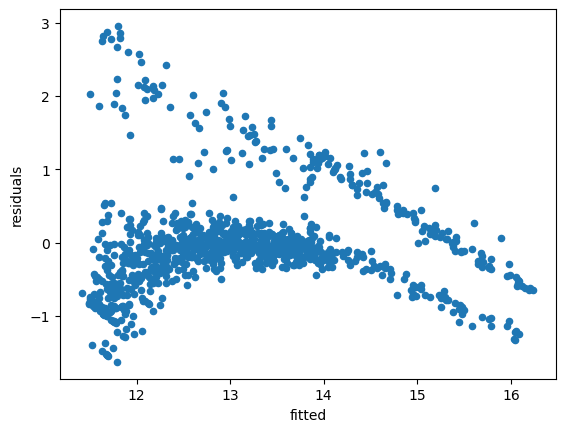

In [43]:

# Quick visual check of residuals
check = pd.DataFrame()
check["residuals"] = y_train - y_prediction
check["fitted"] = y_prediction

check.plot.scatter(x = "fitted", y = "residuals")

The residuals suggest some violations to the assumptions of linear regression. As fitted values get larger, the residuals trend downward. We expect an even band, centered around zero. This does not necessarily make the model predictions unusable, but it puts into question the linear regression assumptions.

## Interpreting The Model

In [51]:
intercept = lm.intercept_

coefficients = lm.coef_
print(coefficients)
print(np.exp(coefficients))
         

[0.05008914 0.01479644 2.20601761]
[1.05136481 1.01490645 9.07948623]


* A year increase in the subject is associated with a 0.04 increase in the log charges, holding smoking status and bmi constant. About a 4% increase in the charges on the regular scale.

* A unit increase in the subject BMI is associated with a 0.01 increase in the log charges, holding smoking status and age constant. About a 1.5% increase in the charges on the regular scale.

* A smoker is associated with a 2.23 increase in the log charges, holding age and bmi constant. About a 930% increase in the charges on the regular scale.

Note: we are not concerned about if these changes are statistically significant, so we don't know if these associations are truly non-zero. Our primary goal is prediction.

## 7 of 9 · Final Model Evaluation

In [52]:
fitted = lm.predict(X_test)

In [53]:
mse = mean_squared_error(y_test, fitted)

In [54]:
print(mse, np.exp(mse))

0.4269775195074405 1.532618207324538


## 8 of 9 · Drawing Conclusions

The test MSE was about 0.435, while the training MSE was about 0.454. In this case, the two errors match up pretty well, so we can conclude that the model is not overfitting the training data. The residuals are low for larger fitted values, suggesting the model is predicting much lower costs for subjects who were actually charged much higher. Therefore the model struggles with these higher costs. As a whole, the model predictions are too conservative.

We might improve the model by including more complex terms in the regression, such as interactions or quadratic terms.